In [308]:
import aotools
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as sp

r0 = 0.1 #Fried parameter [m] - typically 5-10 cm for vertical viewing 
N = 100 #pixel number
delta = 0.01 #length scale of pixels [m]
L0 = 100.0 #Length of outer scale [m] - typically 100 m
l0 = 0.01 #Length of inner scale [m] - typically 1-100 mm

set_number = 40

#ps = [aotools.turbulence.phasescreen.ft_phase_screen(r0, N, delta, L0, l0, FFT=None, seed=None) for i in range(set_number)]

ps = [aotools.turbulence.phasescreen.ft_sh_phase_screen(r0, N, delta, L0, l0, FFT=None, seed=None) for i in range(set_number)]


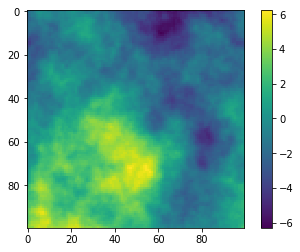

In [309]:
plt.figure()
plt.imshow(ps[0])
plt.colorbar()

In [310]:
"""
Adapted from Matlab code written by (Schmidt,2010-Chp 2-pg 36)
"""
def ft2(g, delta):
   
    return sp.fftshift( sp.fft2( sp.fftshift(g) ) ) * delta**2

"""
Adapted from Matlab code written by (Schmidt,2010,Chp2,pg37)
"""
def ift2(G, delta_f):
    
    N = G.shape[0]
    
    return sp.ifftshift( sp.ifft2( sp.ifftshift(G) ) ) * (N * delta_f)**2



def str_fcn2_ft(ph, mask, delta):
    
    N = ph.shape[0]
    ph = ph * mask
    
    P = ft2(ph, delta)
    S = ft2(ph**2, delta)
    W = ft2(mask, delta)
    
    delta_f = 1/(N*delta)
    w2 = ift2(W*np.conj(W),delta_f)
    
    D = 2 * ift2(np.real(S* np.conj(W)) - np.abs(P)**2, delta_f) / w2 * mask
    
    return D

In [311]:
del_r = np.arange(0,N) * delta

In [312]:
vk = aotools.turbulence.slopecovariance.structure_function_vk(del_r, r0, L0)
kol = aotools.turbulence.slopecovariance.structure_function_kolmogorov(del_r, r0)

#sf = [aotools.turbulence.calculate_structure_function(phase_screen, nbOfPoint=N, step=None) for i, phase_screen in enumerate(ps)]
mask = np.ones((N,N))
sf_com = [str_fcn2_ft(phase_screen, mask, delta) for i, phase_screen in enumerate(ps)]

sh_sf = [aotools.turbulence.calculate_structure_function(sh_phase_screen, nbOfPoint=N, step=None) for i, sh_phase_screen in enumerate(sh_ps)]


In [313]:
#sf = np.asarray(sf)
sh_sf = np.asarray(sh_sf)
sf_com = np.asarray(np.abs(sf_com))

#av_sf = sf.mean(axis = 0)
av_sh_sf = sh_sf.mean(axis = 0)

av_sf_com = sf_com.mean(axis = 0)

In [314]:
print(sf_com.shape, av_sf_com.shape)

(40, 100, 100) (100, 100)


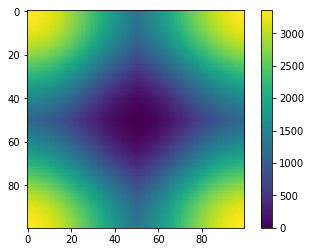

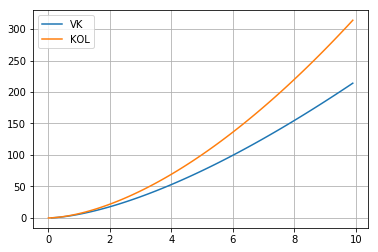

In [315]:
plt.figure()
plt.imshow(np.real(av_sf_com)**2)
plt.colorbar()

plt.figure()
plt.plot(abs(del_r)/r0 ,vk, label = 'VK') 
plt.plot(abs(del_r)/r0 ,kol, label = 'KOL')
#plt.plot(abs(del_r)/r0 ,av_sf,'-.',label = 'FT')
#plt.plot(abs(del_r)/r0, av_sh_sf ,'-.',label = 'SF')
plt.legend()
plt.grid()
plt.show()

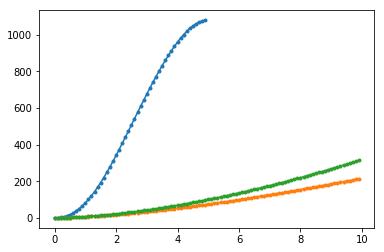

In [316]:
"""
Inspect middle row cross-section of intensity and phase
"""

rows,cols = av_sf_com.shape

mid_row = int(rows / 2)

av_sf_com_slice = av_sf_com[mid_row]
av_sf_com_slice = av_sf_com_slice[int(N/2)::]

#xn_slice = xn[mid_row]

plt.figure()
plt.plot(abs(del_r[0:int(N/2)])/r0, np.real(av_sf_com_slice)**2, '.-')
plt.plot(abs(del_r)/r0 ,vk, '.-', label = 'VK') 
plt.plot(abs(del_r)/r0 ,kol, '.-', label = 'KOL')

In [317]:
"""
Rectangular function - Good test source since we can generate analytical comparisons
"""

def rect(x, a):
    
    y = np.zeros_like(x)
    
    for i, xn in enumerate(x):
        
        if (abs(xn) < a / 2.0):
            
            y[i] = 1.0
            
        if (abs(xn) == a / 2.0):
            
            y[i] = 0.5
            
        if (abs(xn) > a / 2.0):
            
            y[i] = 0.0
            
    return y
       

In [318]:
def tri(t):
    
    t = np.abs(t)
    y = np.zeros_like(t)
    
    for i, xn in enumerate(x):
        
        if (abs(a*xn) < 1):
            
            y[i] = 1 - abs(a*xn)
            
        else:
            
            y[i] = 0
        
    return y

In [319]:

N = 256; # number of samples
L = 16; # grid size [m]
delta = L / N; # sample spacing [m]
F = 1/L; # frequency-domain grid spacing [1/m]

x = np.arange(-N/2, N/2) * delta;
y = np.arange(-N/2, N/2) * delta;

w = 2.0 # width of rectangle
rect_x,rect_y = np.meshgrid(rect(x/w,1),rect(y/w,1))
A = ax*ay
mask = np.ones((N,N))
#perform digital structure function
C = str_fcn2_ft(A, mask, delta) / delta**2;
#continuous structure function
tri_x,tri_y = np.meshgrid(tri(x,1/w),tri(y/w,1))
C_cont = 2 * w**2 * (1 - tri_x * tri_y)

TypeError: tri() takes 1 positional argument but 2 were given

In [ ]:
plt.figure()
plt.imshow(np.abs(C))
plt.colorbar()

plt.figure()
plt.imshow(np.abs(C_cont))
plt.colorbar()

In [ ]:

rows,cols = C.shape

mid_row = int(rows / 2)

C_slice = C[mid_row]
C_cont_slice = C_cont[mid_row]
#xn_slice = xn[mid_row]

plt.figure()
plt.plot(x, C_slice, '.-')
plt.plot(x ,C_cont_slice, '.-') 


In [ ]:
print(C)